In [44]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("2022 Survey.csv")
df

,Timestamp,Please select your country:,What region do you work in?,What city do you work in?,Are you a chartered engineer?,What province do you work in?,What city do you work in?.1,Select your highest level of professional attainment?,What state do you live in?,What is your highest level of professional attainment?,...,How are you compensated for overtime?,Are you actively looking to change jobs?,Does your employer offer any student loan reimbursement?,Do you have a company vehicle?,"What is your overall job satisfaction considering your pay, work-life balance, benefits, community standing, and all other factors?","What salary would it take for you to change employers for a similar role, assuming the benefits are the same?",If there is any additional relevant information about your job you feel someone who looks at your responses needs to know please provide it below.,Please select your gender,"How many hours of paternity leave does your company offer, if any?","How many hours of maternity leave does your company offer, if any?"
0,8/12/2022 12:31:17,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Straight time (1.0x),No,No,No,6,90000,NaN,Male,40,40
1,8/12/2022 12:31:30,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Time and a half (1.5x),No,No,No,8,"75,000",NaN,Male,Unknown,NaN
2,8/12/2022 12:33:09,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Not compensated (Exempt),No,No,No,9,95000,"My work is exclusively stormwater, I have a pr...",Male,40,80
3,8/12/2022 12:35:49,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Not compensated (Exempt),Yes,No,No,4,115000,Recent grad with 6 years general contracting e...,Male,0,0
4,8/12/2022 12:37:53,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Not compensated (Exempt),No,No,No,8,80000,NaN,Male,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2201,1/23/2023 14:39:59,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Time and a half (1.5x),No,No,No,5,100000,NaN,Male,3 months,3 months
2202,1/23/2023 20:50:38,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Not compensated (Exempt),No,No,No,6,125000,NaN,Female,NaN,40
2203,1/23/2023 21:35:26,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Not compensated (Exempt),Yes,Yes,No,7,115000,NaN,Prefer not to say,90,NaN
2204,1/24/2023 0:47:42,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Not compensated (Exempt),No,No,No,8,120000,NaN,Male,unknown,unknown


In [103]:
df1 = df.copy()
df1 = df1[df1["Please select your country:"] == "United Kingdom"]
df1 = df1[df1["Do you work in the Public or Private sector?"] == "Private"]
df1 = df1[df1["What is your current salary?"] != 0]
df1.columns

Index(['Timestamp', 'Please select your country:',
       'What region do you work in?', 'What city do you work in?',
       'Are you a chartered engineer?', 'What province do you work in?',
       'What city do you work in?.1',
       'Select your highest level of professional attainment?',
       'What state do you live in?',
       'What is your highest level of professional attainment?',
       'What state do you work in?', 'What city do you work in?.2',
       'Select your highest level of professional attainment?.1',
       'Select your highest level of education attainment',
       'Company Name (Optional)', 'Company Head Count',
       'What is your job title?',
       'Which best describes your participation in the Civil Engineering industry?',
       'Which sub discipline do you work in?',
       'Do you work in the Public or Private sector?',
       'How many years of post-graduate experience do you have in Civil Engineering?',
       'What is your current salary?',
       '

In [104]:
df2 = df1.copy()
df2 = df2[df2["Select your highest level of education attainment"] == "Masters Degree"]

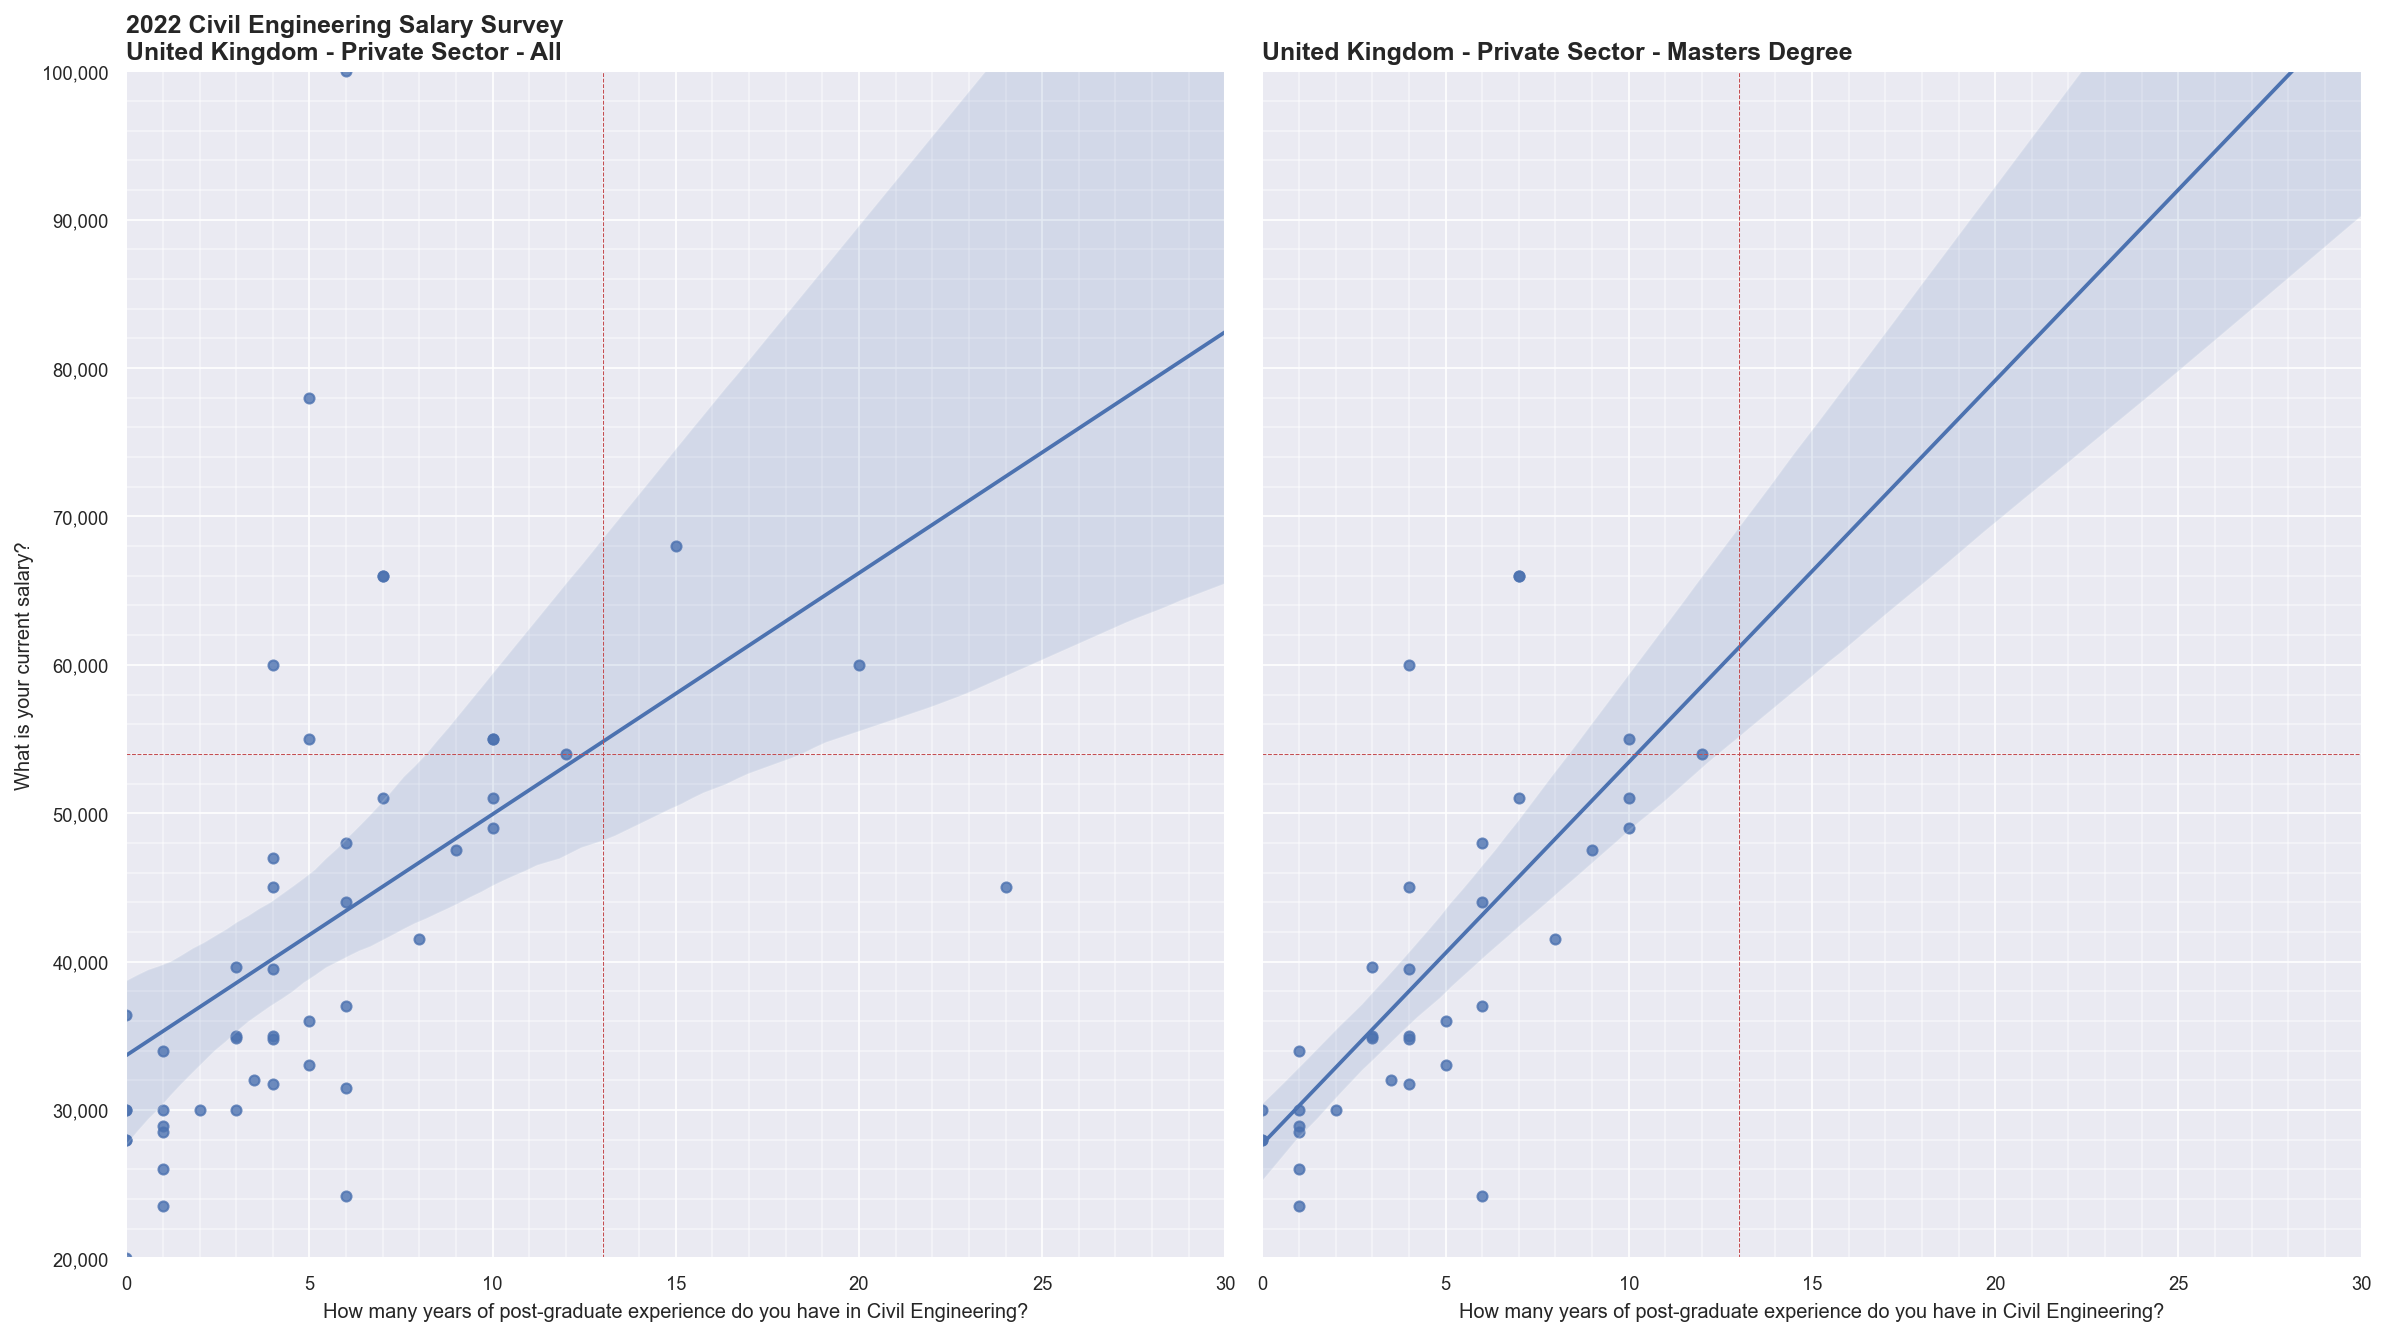

In [123]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 9), dpi=150)

sns.set_theme("paper")

# Title
ax[0].set_title(
    "2022 Civil Engineering Salary Survey\nUnited Kingdom - Private Sector - All",
    fontdict={"fontsize": 12, "fontweight": "bold"},
    loc="left",
)

ax[0].set_ylim([20000, 100000])
ax[0].set_xlim([0, 30])

sns.regplot(
    x="How many years of post-graduate experience do you have in Civil Engineering?",
    y="What is your current salary?",
    data=df1,
    ax=ax[0],
    truncate=False,
)

ax[0].yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter("{x:,.0f}"))

# Minor Ticks
ax[0].minorticks_on()
ax[0].grid(which="minor", axis="both", alpha=0.5)

ax[0].xaxis.set_major_locator(ticker.MultipleLocator(5))
ax[0].xaxis.set_minor_locator(ticker.MultipleLocator(1))

ax[0].yaxis.set_major_locator(ticker.MultipleLocator(10000))
ax[0].yaxis.set_minor_locator(ticker.MultipleLocator(2000))


# Title
ax[1].set_title(
    "\nUnited Kingdom - Private Sector - Masters Degree",
    fontdict={"fontsize": 12, "fontweight": "bold"},
    loc="left",
)

ax[1].set_ylim([20000, 100000])
ax[1].set_xlim([0, 30])

sns.regplot(
    x="How many years of post-graduate experience do you have in Civil Engineering?",
    y="What is your current salary?",
    data=df2,
    ax=ax[1],
    truncate=False,
)


# Minor Ticks
ax[1].minorticks_on()
ax[1].grid(which="minor", axis="both", alpha=0.5)

ax[1].set_ylabel(None)


ax[1].xaxis.set_major_locator(ticker.MultipleLocator(5))
ax[1].xaxis.set_minor_locator(ticker.MultipleLocator(1))

plt.tight_layout()